# Representing Agents and Environments

## Building the Environment Class


* **Initialize the Grid:** Define the size of the grid (width and height) and initialize it. You might use a 2D array or a list of lists to represent the grid, where each cell can hold information about what's in that location (e.g., empty, an obstacle, an agent).

* **Add Features to the Grid:** Depending on your simulation's needs, you might want to add features like obstacles, targets, or resources. These features could be added at the initialization stage or dynamically during the simulation.

* **Update and Render Methods:** Implement methods to update the grid's state and render it for visualization. The update method can handle changes over time, such as moving obstacles or regenerating resources. The render method can be as simple as printing the grid to the console or as complex as creating a graphical representation.

* **Interaction Methods:** Provide methods that allow agents to interact with the environment. This might include moving from one grid cell to another, checking the contents of a cell, or altering the grid by adding or removing features.

In [10]:
class Environment:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = [[None for _ in range(width)] for _ in range(height)]

    def add_feature(self, feature, location):
        # Add feature to the grid at the specified location
        pass

    def update(self):
        # Update the environment state
        pass

    def render(self):
        # Render the grid for visualization
        pass


## Designing the Agent Class

* **Agent Initialization:** Define the initial state of an agent, including its position on the grid and any other relevant properties like health, energy, or inventory.

* **Movement Methods:** Implement methods that allow the agent to move within the grid, ensuring that movements are valid within the constraints of the environment (e.g., not moving into obstacles).

* **Action Methods:** Besides moving, agents might perform other actions such as picking up items, interacting with other agents, or altering the environment. Define these actions as methods within the agent class.

* **Perception Method:** Agents may need to "perceive" their surroundings to make decisions. Implement a method that allows an agent to inspect adjacent grid cells or the entire environment, depending on the simulation's complexity and rules.

* **Decision Making:** Depending on your simulation's goals, agents might follow simple scripted behaviors or use more complex algorithms (like machine learning) to decide their actions. This could involve implementing a method that decides the next action based on the agent's state and perceptions.

In [11]:
class Agent:
    def __init__(self, environment, start_pos):
        self.environment = environment
        self.position = start_pos

    def move(self, direction):
        # Move the agent in the specified direction
        pass

    def act(self):
        # Perform an action based on perception and decision making
        pass

    def perceive(self):
        # Perceive the surroundings and return information
        pass



In [12]:
# Example usage
env = Environment(10, 10)
agent = Agent(env, (5, 5))

# Use Case Description: Autonomous Robot Navigation in a Warehouse

## Overview
In a modern warehouse, efficient space management and timely retrieval of goods are crucial for operational efficiency. Autonomous robots are employed to navigate the warehouse, move goods, and perform inventory checks. The simulation of robot movement within a grid-like environment mirrors the real-world layout of a warehouse, where aisles and racks are arranged in a structured manner. This simulation framework can be used to develop and test algorithms for pathfinding, obstacle avoidance, and optimal resource allocation in a controlled virtual environment before deploying them in actual warehouse operations.

## Objectives
Pathfinding and Navigation: Develop algorithms that enable robots to find the shortest and most efficient paths from one point to another while avoiding obstacles such as stationary and moving objects (e.g., other robots, human workers).
* **Task Optimization:** Implement task allocation strategies that minimize travel time and energy consumption, enhancing overall productivity.
* **Safety and Collision Avoidance:** Ensure that robots can detect potential collisions and dynamically adjust their paths to maintain a safe working environment for both robots and human workers.

## Implementation Details
Environment Setup: The warehouse layout is represented as a grid, with each cell corresponding to a specific area in the warehouse. Obstacles, such as racks and designated no-go zones, are marked within the grid.

* **Agent (Robot) Capabilities:**Each robot is equipped with sensors and algorithms that allow it to perceive its surroundings, make decisions, and move within the grid. The robots can perform tasks such as picking up and dropping off goods at specified locations.
* **Simulation and Testing:** The simulation environment is used to test various scenarios, including high-traffic conditions, emergency situations, and new layout configurations. This helps in identifying bottlenecks and optimizing the flow of robots and goods within the warehouse.

## Step 1: Define the Environment and Agent Classes

In [1]:
class Environment:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        # Initialize grid to None
        self.grid = [[None for _ in range(width)] for _ in range(height)]

    def place_agent(self, agent, x, y):
        if 0 <= x < self.width and 0 <= y < self.height:
            self.grid[y][x] = agent
            agent.x = x
            agent.y = y

    def move_agent(self, agent, dx, dy):
        new_x, new_y = agent.x + dx, agent.y + dy
        if 0 <= new_x < self.width and 0 <= new_y < self.height:
            # Update grid with new position
            self.grid[agent.y][agent.x] = None  # Remove agent from old position
            self.grid[new_y][new_x] = agent  # Place agent at new position
            agent.x = new_x
            agent.y = new_y
            return True
        return False



In [2]:
class Agent:
    def __init__(self, environment):
        self.environment = environment
        self.x = None
        self.y = None
        self.path_x = []
        self.path_y = []

    def move(self, dx, dy):
        if self.environment.move_agent(self, dx, dy):
            self.path_x.append(self.x)
            self.path_y.append(self.y)

    def move_up(self): self.move(0, -1)
    def move_down(self): self.move(0, 1)
    def move_left(self): self.move(-1, 0)
    def move_right(self): self.move(1, 0)


## Step 2: Initialize the Environment and Agent, Simulate Movement

In [3]:
env = Environment(10, 10)  # A 10x10 grid
robot = Agent(env)
env.place_agent(robot, 5, 5)  # Place the robot at position (5, 5)

# Simulate movements
robot.move_up()
robot.move_up()
robot.move_right()
robot.move_right()
robot.move_down()
robot.move_left()


## Step 3: Plot the Agent's Path within the Environment

In [5]:
import matplotlib.pyplot as plt

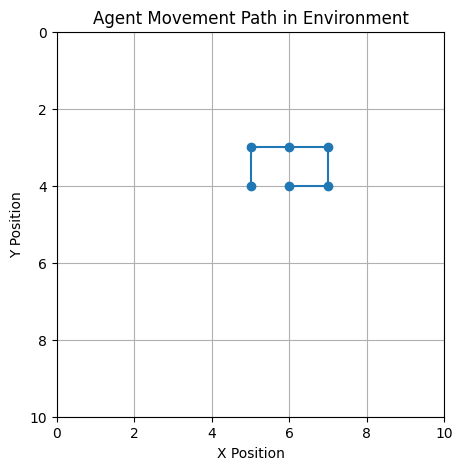

In [6]:
plt.figure(figsize=(5, 5))
plt.plot(robot.path_x, robot.path_y, marker='o', linestyle='-')
plt.xlim(0, env.width)
plt.ylim(0, env.height)
plt.title('Agent Movement Path in Environment')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.gca().invert_yaxis()  # Invert y-axis to match grid's origin at top-left
plt.show()
